In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

In [11]:
df = pd.read_csv("xyz.csv")
df

Longitud  Latitud  Profundidad
0      -94.61    15.14           23
1      -94.40    15.20           16
2      -94.66    15.37           18
3      -94.29    14.94           16
4      -94.34    15.10           19
..        ...      ...          ...
945    -94.65    15.29           29
946    -94.64    15.24           13
947    -94.85    15.62           32
948    -94.11    14.85           58
949    -94.14    14.86           31

[950 rows x 3 columns]

In [60]:
x= df['Longitud']
y= df['Latitud']
z= -df['Profundidad']


fig = plt.figure()

ax=fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z, c=z, cmap='Set1')
plt.show()

In [105]:
def coste(x,y,z,a,b,c):
    m=len(x)
    error=0.0
    for i in range(m):
        hip=a*x[i]+b*y[i]+c
        error+=(z[i]-hip)**2
    return error/(2*m)

In [106]:
def dG(x,y,z,a,b,c,alpha,epochs):
    m=len(x)
    hcoste=[]
    for ep in range(epochs):
        a_deriv=0.0; b_deriv=0.0; c_deriv=0.0
        for i in range(m):
            hip=a*x[i]+b*y[i]+c
            c_deriv+=(hip-z[i])
            a_deriv+=(hip-z[i])*x[i]
            b_deriv+=(hip-z[i])*y[i]
            #hcoste.append(coste(x,y,z,a,b,c))

        a-=(a_deriv/m)*alpha
        b-=(b_deriv/m)*alpha
        c-=(c_deriv/m)*alpha
    return a,b,c,hcoste

In [112]:
a=-1; b=-1; c=-1; alpha=0.1; epochs= 100;
a,b,c,hist=dG(x,y,z,a,b,c,alpha,epochs)

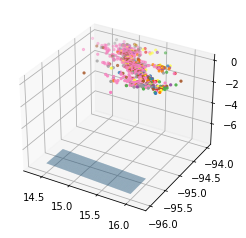

In [113]:
Res=100
x1,y1=np.linspace(14.5,16,Res),np.linspace(-95.5,-96,Res)
X1,Y1=np.meshgrid(x1,y1)

Z1=(a)*X1+(b)*Y1+c

fig=plt.figure()
pl=fig.add_subplot(111,projection='3d')
pl.scatter3D(y,x,z, c=z, cmap='Set1', marker='.')
pl.plot_surface(X1,Y1,Z1,alpha=0.5)
plt.show()

In [104]:
print(f'La ecuación del plano es: {a}x+({b}y)+{c}')

La ecuación del plano es: 1.2936010037555165e+296x+(-2.1019813269968813e+295y)+-1.3660334940642888e+294
